In [166]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, matthews_corrcoef,classification_report
import time
from sklearn.model_selection import train_test_split
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import pickle

warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
print('✓ Libraries imported successfully')

✓ Libraries imported successfully


In [167]:
pd.set_option('display.max_columns', None)     # show all columns
pd.set_option('display.width', 200)

# TODO: Load your dataset
data_set = pd.read_csv("fetal_health.csv")
print(data_set)

print(data_set.columns)

      baseline value  accelerations  fetal_movement  uterine_contractions  light_decelerations  severe_decelerations  prolongued_decelerations  abnormal_short_term_variability  \
0                120          0.000           0.000                 0.000                0.000                   0.0                       0.0                               73   
1                132          0.006           0.000                 0.006                0.003                   0.0                       0.0                               17   
2                133          0.003           0.000                 0.008                0.003                   0.0                       0.0                               16   
3                134          0.003           0.000                 0.008                0.003                   0.0                       0.0                               16   
4                132          0.007           0.000                 0.008                0.000           

In [168]:
X = data_set.iloc[:,:-1]
y = data_set[["fetal_health"]]

X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,random_state=42,test_size=0.2)

print(X_Train.head(5))
print(y_Train.head(5))
print(X_Test.head(5))
print(y_Test.head(5))

      baseline value  accelerations  fetal_movement  uterine_contractions  light_decelerations  severe_decelerations  prolongued_decelerations  abnormal_short_term_variability  \
1233             125          0.000             0.0                 0.008                0.000                   0.0                       0.0                               32   
480              140          0.000             0.0                 0.001                0.000                   0.0                       0.0                               60   
1111             122          0.000             0.0                 0.000                0.001                   0.0                       0.0                               20   
1303             137          0.005             0.0                 0.005                0.002                   0.0                       0.0                               36   
861              142          0.003             0.0                 0.004                0.000           

In [169]:
print(data_set.isna().sum())
print("\n")
print("No Null Values")

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [170]:
def find_outliers(data, name):
    data = np.array(data)
    data = data[~np.isnan(data)]   # remove NaNs

    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = data[(data < lower) | (data > upper)]

    print(f"\n====== {name.upper()} ======")
    print("Q1:", Q1)
    print("Q3:", Q3)
    print("IQR:", IQR)
    print("Lower Bound:", lower)
    print("Upper Bound:", upper)
    print("Outliers:", outliers)


In [171]:
# List of columns I want to analyze in train_data_set
iqr_columns = [
    "abnormal_short_term_variability",
    "mean_value_of_long_term_variability",
    "histogram_width",
    "histogram_min",
    "histogram_max",
    "histogram_mode",
    "histogram_mean",
    "histogram_median",
    "histogram_variance"
]

# Loop through each column and compute outliers
for col in iqr_columns:
    find_outliers(X_Train[col], col)

# List of columns I want to analyze in test_data_set

for col in X_Test.columns:
    find_outliers(X_Test[col], col)


====== ABNORMAL_SHORT_TERM_VARIABILITY ======
Q1: 32.0
Q3: 61.0
IQR: 29.0
Lower Bound: -11.5
Upper Bound: 104.5
Outliers: []

====== MEAN_VALUE_OF_LONG_TERM_VARIABILITY ======
Q1: 4.6
Q3: 10.925
IQR: 6.325000000000001
Lower Bound: -4.887500000000001
Upper Bound: 20.4125
Outliers: [25.4 24.7 34.7 20.5 36.9 26.3 21.4 25.6 29.1 22.7 25.3 33.5 27.3 25.8
 23.1 23.6 29.6 21.7 23.4 25.8 27.6 29.3 21.1 26.1 20.8 26.3 23.  25.1
 27.6 29.  21.1 25.9 41.8 21.3 21.7 25.2 21.  21.3 50.7 21.3 28.9 29.5
 21.5 22.1 24.2 21.3 27.  28.  22.5 23.3 35.7 24.1 21.7 40.8 20.5 24.9]

====== HISTOGRAM_WIDTH ======
Q1: 36.0
Q3: 101.0
IQR: 65.0
Lower Bound: -61.5
Upper Bound: 198.5
Outliers: []

====== HISTOGRAM_MIN ======
Q1: 66.0
Q3: 120.0
IQR: 54.0
Lower Bound: -15.0
Upper Bound: 201.0
Outliers: []

====== HISTOGRAM_MAX ======
Q1: 152.0
Q3: 174.0
IQR: 22.0
Lower Bound: 119.0
Upper Bound: 207.0
Outliers: [238 211 213 238 230 211 228 238 238 211 228 230 238 228]

====== HISTOGRAM_MODE ======
Q1: 129.0
Q3: 148.

In [172]:
def remove_outliers(df, columns, thresh=3.5):
    clean = df.copy()

    for col in columns:
        x = clean[col]
        median = np.nanmedian(x)
        mad = np.nanmedian(np.abs(x - median))

        if mad == 0:
            continue

        modified_z = 0.6745 * (x - median) / mad
        clean = clean[np.abs(modified_z) <= thresh]

    return clean


Box plots for train_data_set before remving outliers


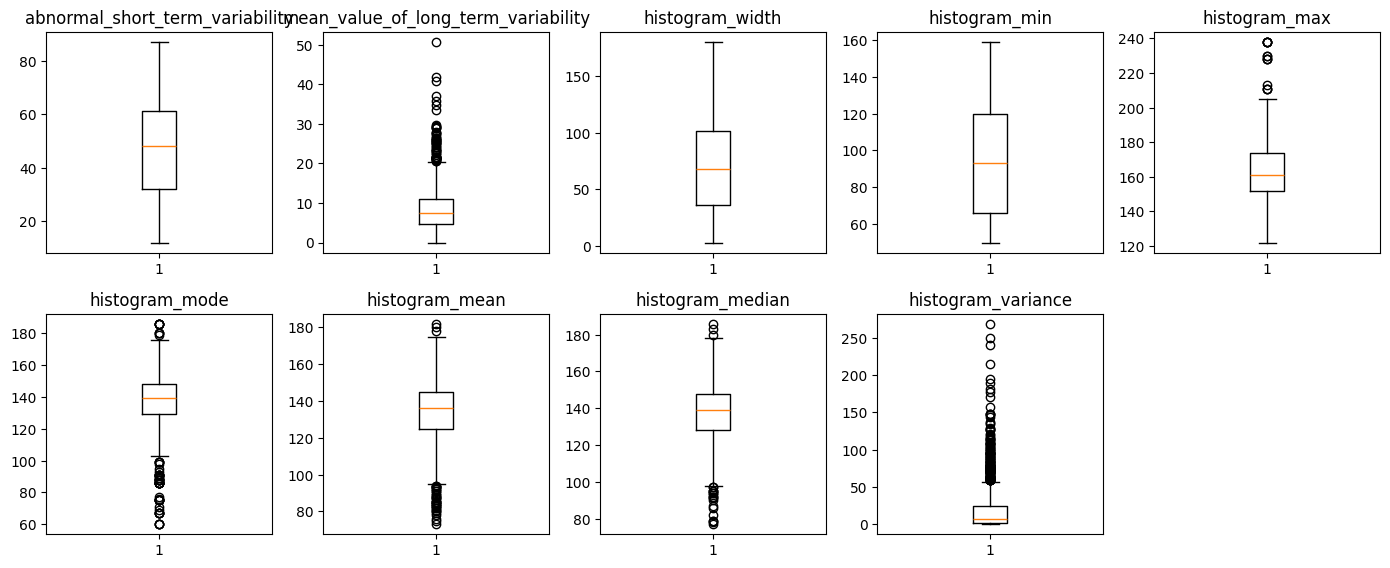

In [173]:
print("Box plots for train_data_set before remving outliers")

plt.figure(figsize=(14, 14))

for i, col in enumerate(iqr_columns):
        plt.subplot(5, 5, i + 1)     # 3 rows, 3 columns
        plt.boxplot(X_Train[col])
        plt.title(col)

plt.tight_layout()
plt.show()



Box plots for test_data_set before removing outliers


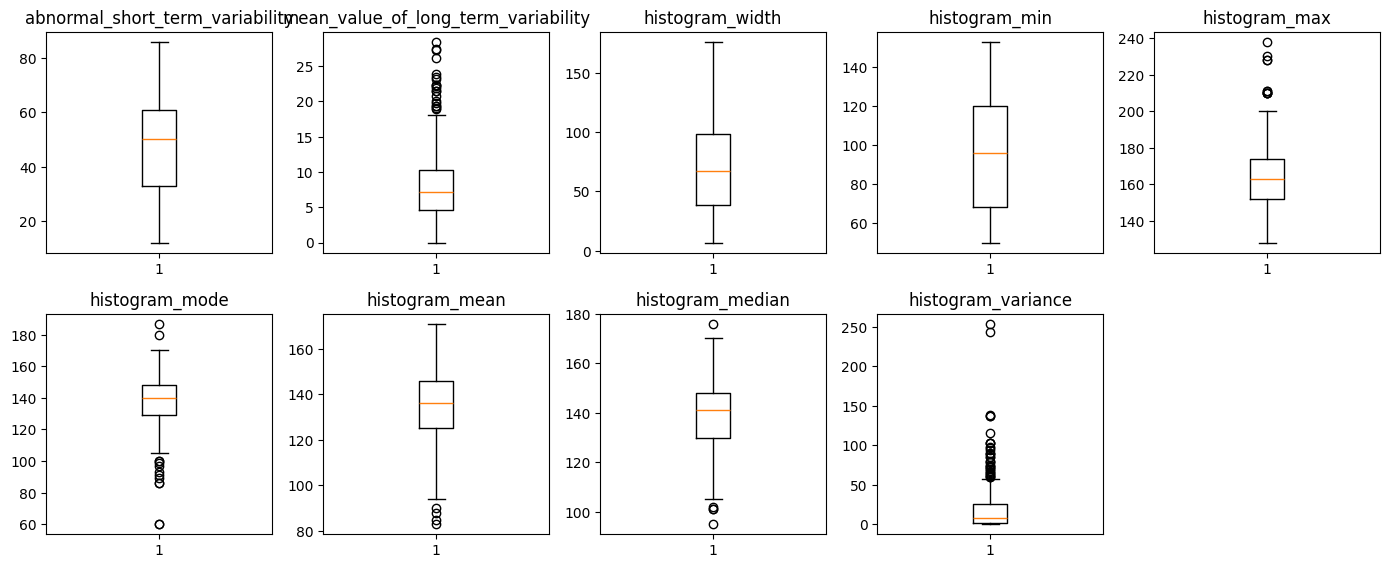

In [174]:
print("Box plots for test_data_set before removing outliers")

plt.figure(figsize=(14, 14))

for i, col in enumerate(iqr_columns):
        plt.subplot(5, 5, i + 1)     # 3 rows, 3 columns
        plt.boxplot(X_Test[col])
        plt.title(col)

plt.tight_layout()
plt.show()



In [175]:
clean_dataset_train = remove_outliers(X_Train, iqr_columns)
clean_dataset_test = remove_outliers(X_Test, iqr_columns)

Box plots for train_data_set after removing outliers


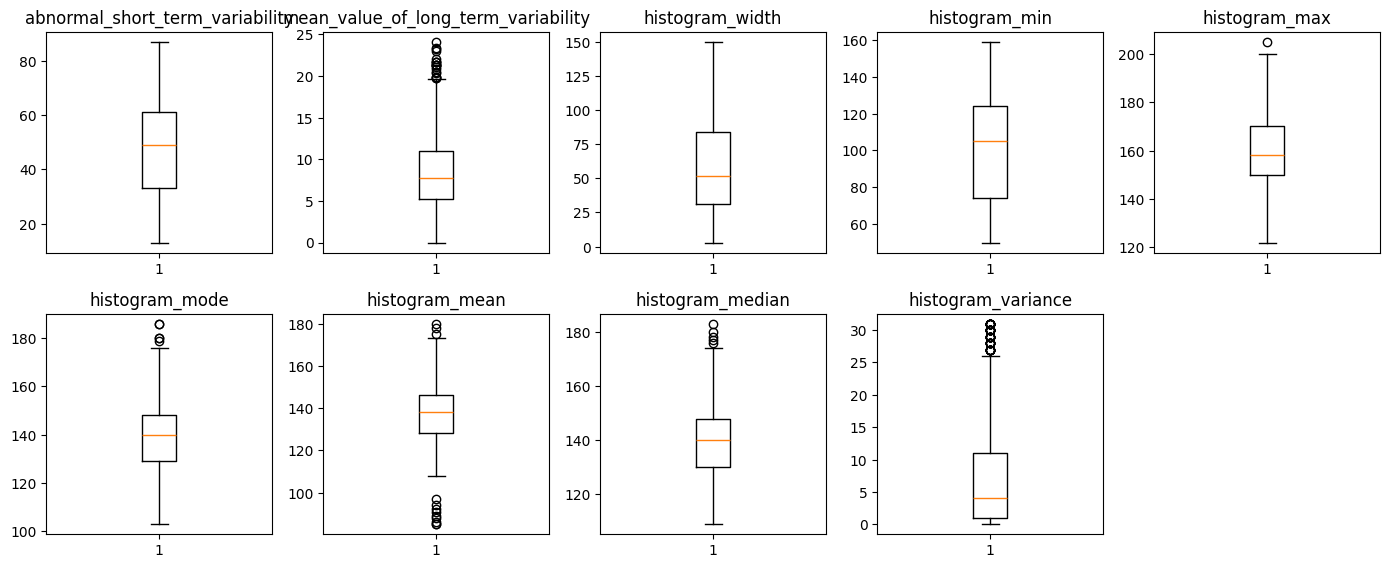

In [176]:
print("Box plots for train_data_set after removing outliers")

plt.figure(figsize=(14, 14))

for i, col in enumerate(iqr_columns):
        plt.subplot(5, 5, i + 1)     # 3 rows, 3 columns
        plt.boxplot(clean_dataset_train[col])
        plt.title(col)

plt.tight_layout()
plt.show()



Box plots for test_data_set after removing outliers


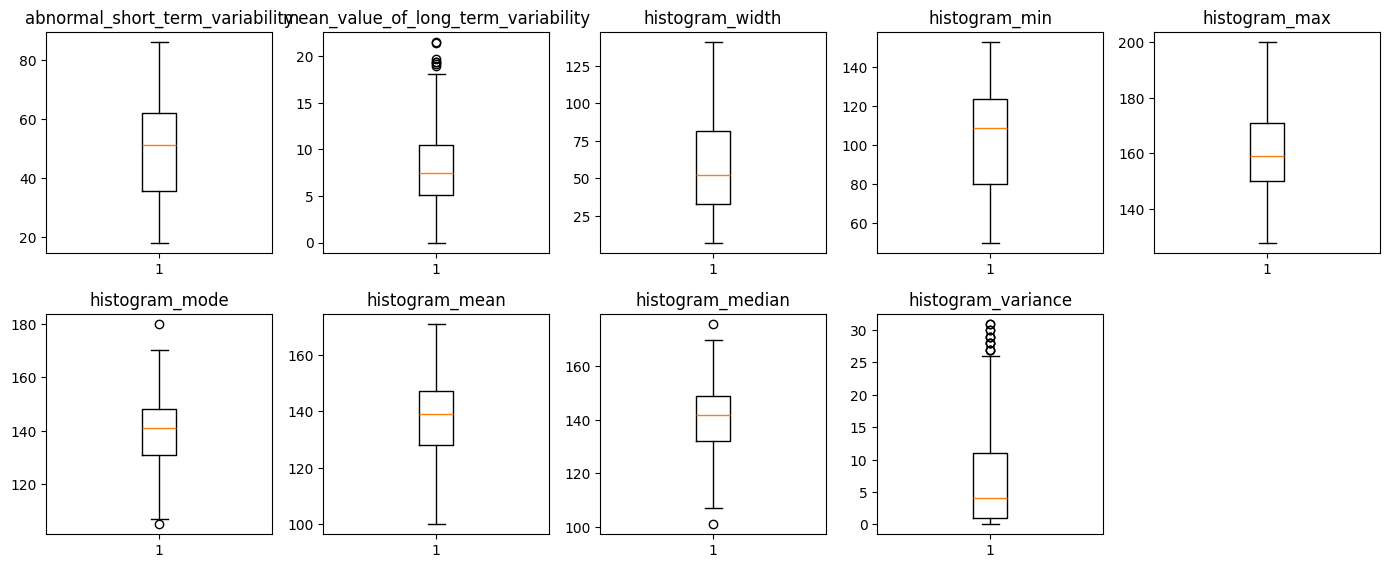

In [177]:
print("Box plots for test_data_set after removing outliers")

plt.figure(figsize=(14, 14))

for i, col in enumerate(iqr_columns):
        plt.subplot(5, 5, i + 1)     # 3 rows, 3 columns
        plt.boxplot(clean_dataset_test[col])
        plt.title(col)

plt.tight_layout()
plt.show()

In [178]:
# List of columns I want to analyze in train_data_set

# Loop through each column and compute outliers
for col in iqr_columns:
    find_outliers(clean_dataset_train[col], col)

# List of columns I want to analyze in test_data_set

for col in iqr_columns:
    find_outliers(clean_dataset_test[col], col)


====== ABNORMAL_SHORT_TERM_VARIABILITY ======
Q1: 33.0
Q3: 61.0
IQR: 28.0
Lower Bound: -9.0
Upper Bound: 103.0
Outliers: []

====== MEAN_VALUE_OF_LONG_TERM_VARIABILITY ======
Q1: 5.2
Q3: 11.0
IQR: 5.8
Lower Bound: -3.499999999999999
Upper Bound: 19.7
Outliers: [19.9 21.7 23.4 19.8 20.8 23.  21.1 21.3 21.7 20.4 21.3 21.3 22.1 19.9
 21.3 23.3 19.8 24.1 21.7 20.5]

====== HISTOGRAM_WIDTH ======
Q1: 31.0
Q3: 84.0
IQR: 53.0
Lower Bound: -48.5
Upper Bound: 163.5
Outliers: []

====== HISTOGRAM_MIN ======
Q1: 74.0
Q3: 124.0
IQR: 50.0
Lower Bound: -1.0
Upper Bound: 199.0
Outliers: []

====== HISTOGRAM_MAX ======
Q1: 150.0
Q3: 170.0
IQR: 20.0
Lower Bound: 120.0
Upper Bound: 200.0
Outliers: [205]

====== HISTOGRAM_MODE ======
Q1: 129.0
Q3: 148.0
IQR: 19.0
Lower Bound: 100.5
Upper Bound: 176.5
Outliers: [186 180 180 186 179]

====== HISTOGRAM_MEAN ======
Q1: 128.0
Q3: 146.0
IQR: 18.0
Lower Bound: 101.0
Upper Bound: 173.0
Outliers: [ 85 178  88  97 175 180  91  85  92  94  89  86]

====== HISTOGRA

In [179]:
# Fill these after preprocessing
train_samples = 1700       # Number of training samples
test_samples = 426         # Number of test samples
train_test_ratio = 0.8  # e.g., 0.8 for 80-20 split

print(f"Train samples: {train_samples}")
print(f"Test samples: {test_samples}")
print(f"Split ratio: {train_test_ratio:.1%}")

Train samples: 1700
Test samples: 426
Split ratio: 80.0%


In [180]:
LR_model = LogisticRegression()

# Train Base Model
print("Training LR model...")
LR_start_time = time.time()

y = y_Train.loc[clean_dataset_train.index]

LR_model.fit(clean_dataset_train, y)

LR_pred = LR_model.predict(clean_dataset_test)

LR_training_time = time.time() - LR_start_time
print(f"✓ LR training completed in {LR_training_time:.2f}s")

LR_prob = LR_model.predict_proba(clean_dataset_test)

Training LR model...
✓ LR training completed in 0.03s


In [181]:
cm1 = confusion_matrix(y_Test.loc[clean_dataset_test.index], LR_pred)

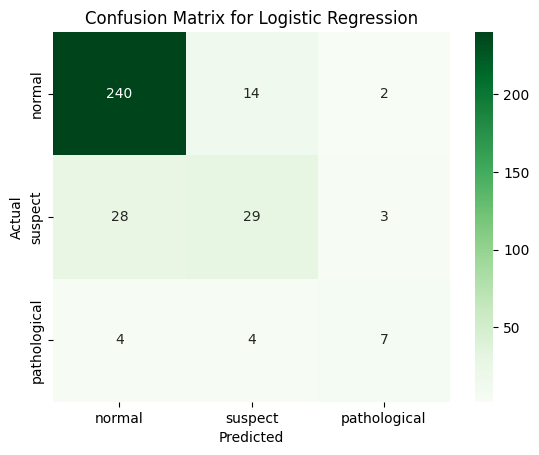

In [182]:
sns.heatmap(cm1, 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=['normal','suspect','pathological'], 
            yticklabels=['normal','suspect','pathological'],
            )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [183]:
y_test = y_Test.loc[clean_dataset_test.index]

print("Classification Report for Logistic Regression:")
print(classification_report(y_test, LR_pred, target_names=["Normal","Suspect","Pathological"]))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

      Normal       0.88      0.94      0.91       256
     Suspect       0.62      0.48      0.54        60
Pathological       0.58      0.47      0.52        15

    accuracy                           0.83       331
   macro avg       0.69      0.63      0.66       331
weighted avg       0.82      0.83      0.82       331



In [184]:
def calculate_metrics(y_true, y_pred,y_prob):

    metrics = {}

    acc = accuracy_score(y_true, y_pred)
    print("Accuracy:", acc)

    auc = roc_auc_score(y_true, y_prob, multi_class="ovr")
    print("ROC AUC:", auc)

    precision = precision_score(y_true, y_pred, average="weighted")
    print("Precision:", precision)

    recall = recall_score(y_true, y_pred, average="weighted")
    print("Recall:", recall)

    f1score = f1_score(y_true, y_pred, average="weighted")
    print("F1 Score:", f1score)

    matthews_corcoef = matthews_corrcoef(y_true, y_pred)
    print("Matthews Correlation Coefficient:", matthews_corcoef)

    metrics['accuracy_score'] = acc
    metrics['roc_auc'] = auc
    metrics['precision'] = precision
    metrics['recall'] = recall
    metrics['f1_score'] = f1score
    metrics['matthews_correlation'] = matthews_corcoef

    return metrics

In [185]:
print("Metrics for Logistic Regression:")
LR_metrics = calculate_metrics(y_test, LR_pred,LR_prob)

Metrics for Logistic Regression:
Accuracy: 0.8338368580060423
ROC AUC: 0.9173739103589611
Precision: 0.8207058294166801
Recall: 0.8338368580060423
F1 Score: 0.8248592597916369
Matthews Correlation Coefficient: 0.5123416314446448


In [186]:
DecisionTree_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10, 
    random_state=42,
    min_samples_split=50,
    )


DecisionTree_model.fit(clean_dataset_train, y)

DT_Pred = DecisionTree_model.predict(clean_dataset_test)
DT_Prob = DecisionTree_model.predict_proba(clean_dataset_test)

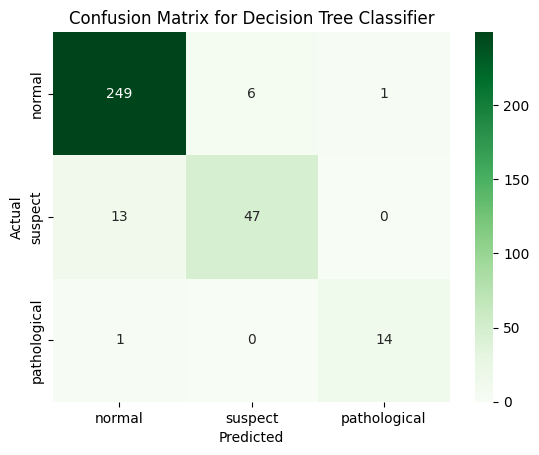

In [187]:
cm2 = confusion_matrix(y_test, DT_Pred)

sns.heatmap(cm2, 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=['normal','suspect','pathological'], 
            yticklabels=['normal','suspect','pathological'],
            )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [188]:
print("Classification Report for Decision Tree Regression:")
print(classification_report(y_test, DT_Pred, target_names=["Normal","Suspect","Pathological"]))

Classification Report for Decision Tree Regression:
              precision    recall  f1-score   support

      Normal       0.95      0.97      0.96       256
     Suspect       0.89      0.78      0.83        60
Pathological       0.93      0.93      0.93        15

    accuracy                           0.94       331
   macro avg       0.92      0.90      0.91       331
weighted avg       0.94      0.94      0.94       331



In [189]:
print("Metrics for Decision Tree Classifer:")
DT_metrics = calculate_metrics(y_test, DT_Pred,DT_Prob)

Metrics for Decision Tree Classifer:
Accuracy: 0.9365558912386707
ROC AUC: 0.9558624885497272
Precision: 0.9352875249062109
Recall: 0.9365558912386707
F1 Score: 0.9352058094316876
Matthews Correlation Coefficient: 0.8225695089325761


In [190]:
KNN_model = KNeighborsClassifier(
    n_neighbors=7
)

KNN_model.fit(clean_dataset_train, y)
KNN_Pred = KNN_model.predict(clean_dataset_test)
KNN_Prob = KNN_model.predict_proba(clean_dataset_test)

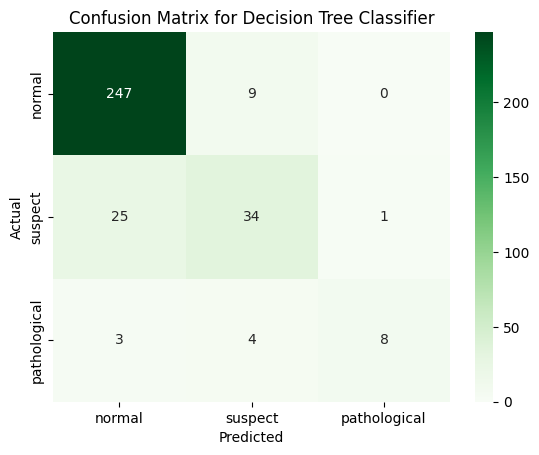

In [191]:
cm3 = confusion_matrix(y_test, KNN_Pred)

sns.heatmap(cm3, 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=['normal','suspect','pathological'], 
            yticklabels=['normal','suspect','pathological'],
            )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [192]:
print("Classification Report for KNN Classifier:")
print(classification_report(y_test, KNN_Pred, target_names=["Normal","Suspect","Pathological"]))

Classification Report for KNN Classifier:
              precision    recall  f1-score   support

      Normal       0.90      0.96      0.93       256
     Suspect       0.72      0.57      0.64        60
Pathological       0.89      0.53      0.67        15

    accuracy                           0.87       331
   macro avg       0.84      0.69      0.74       331
weighted avg       0.87      0.87      0.86       331



In [193]:
print("Metrics for KNN Classifier:")
KNN_metrics = calculate_metrics(y_test, KNN_Pred,KNN_Prob)

Metrics for KNN Classifier:
Accuracy: 0.8731117824773413
ROC AUC: 0.9061595720387583
Precision: 0.8660789550061261
Recall: 0.8731117824773413
F1 Score: 0.8649329295777448
Matthews Correlation Coefficient: 0.6253315171811878


In [194]:
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(clean_dataset_train, y)
GaussianNB_Pred = GaussianNB_model.predict(clean_dataset_test)
GaussianNB_Prob = GaussianNB_model.predict_proba(clean_dataset_test)

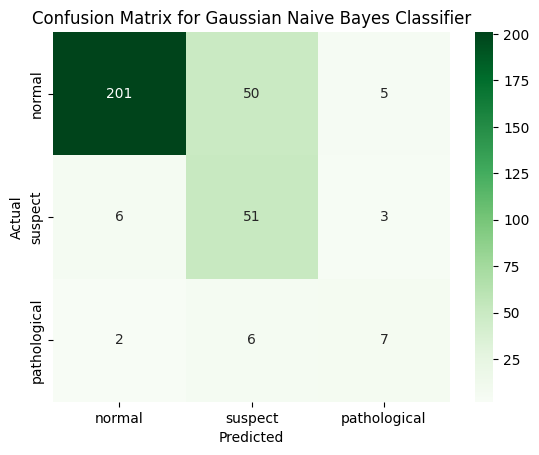

In [195]:
cm4 = confusion_matrix(y_test, GaussianNB_Pred)

sns.heatmap(cm4, 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=['normal','suspect','pathological'], 
            yticklabels=['normal','suspect','pathological'],
            )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gaussian Naive Bayes Classifier')
plt.show()

In [196]:
print("Classification Report for Gaussian Naive Bayes Classifier:")
print(classification_report(y_test, GaussianNB_Pred, target_names=["Normal","Suspect","Pathological"]))

Classification Report for Gaussian Naive Bayes Classifier:
              precision    recall  f1-score   support

      Normal       0.96      0.79      0.86       256
     Suspect       0.48      0.85      0.61        60
Pathological       0.47      0.47      0.47        15

    accuracy                           0.78       331
   macro avg       0.64      0.70      0.65       331
weighted avg       0.85      0.78      0.80       331



In [197]:
print("Metrics for Gaussian Naive Bayes Classifier:")
GaussianNB_metrics = calculate_metrics(y_test, GaussianNB_Pred,GaussianNB_Prob)

Metrics for Gaussian Naive Bayes Classifier:
Accuracy: 0.7824773413897281
ROC AUC: 0.9003644815621414
Precision: 0.8513567606613913
Recall: 0.7824773413897281
F1 Score: 0.800491950510829
Matthews Correlation Coefficient: 0.547978896191767


In [198]:
RandomForestClassifier_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

RandomForestClassifier_model.fit(clean_dataset_train, y)
RF_Pred = RandomForestClassifier_model.predict(clean_dataset_test)
RF_Prob = RandomForestClassifier_model.predict_proba(clean_dataset_test)

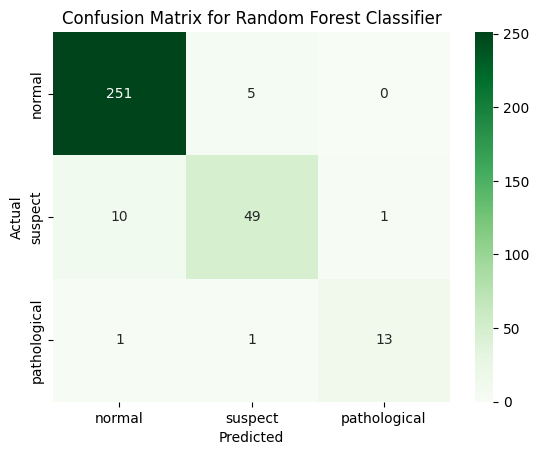

In [199]:
cm5 = confusion_matrix(y_test, RF_Pred)

sns.heatmap(cm5, 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=['normal','suspect','pathological'], 
            yticklabels=['normal','suspect','pathological'],
            )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [200]:
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, RF_Pred, target_names=["Normal","Suspect","Pathological"]))

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97       256
     Suspect       0.89      0.82      0.85        60
Pathological       0.93      0.87      0.90        15

    accuracy                           0.95       331
   macro avg       0.93      0.89      0.91       331
weighted avg       0.94      0.95      0.94       331



In [201]:
print("Metrics for Random Forest Classifier:")
RF_metrics = calculate_metrics(y_test, RF_Pred,RF_Prob)

Metrics for Random Forest Classifier:
Accuracy: 0.945619335347432
ROC AUC: 0.9855276029421688
Precision: 0.9445166926890135
Recall: 0.945619335347432
F1 Score: 0.9446265097804887
Matthews Correlation Coefficient: 0.8482611174070995


In [202]:
XGBClassifier_model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss'
    )

XGBClassifier_model.fit(clean_dataset_train, y-1)
XGB_Pred = XGBClassifier_model.predict(clean_dataset_test)
XGB_Prob = XGBClassifier_model.predict_proba(clean_dataset_test)

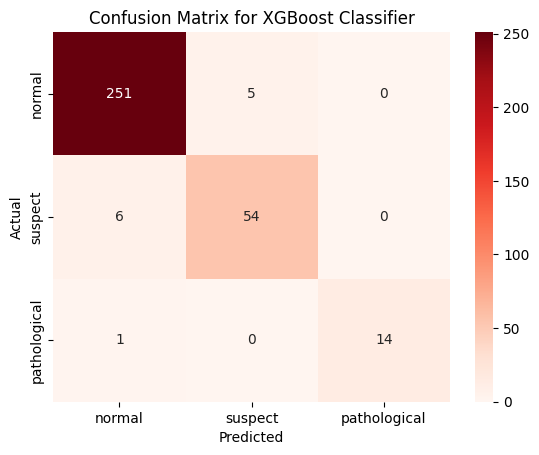

In [203]:
cm6 = confusion_matrix(y_test, XGB_Pred+1)

sns.heatmap(cm6, 
            annot=True, 
            fmt='d', 
            cmap='Reds',
            xticklabels=['normal','suspect','pathological'], 
            yticklabels=['normal','suspect','pathological'],
            )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

In [204]:
print("Classification Report for XGBoost Classifier:")
print(classification_report(y_test, XGB_Pred+1, target_names=["Normal","Suspect","Pathological"]))

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

      Normal       0.97      0.98      0.98       256
     Suspect       0.92      0.90      0.91        60
Pathological       1.00      0.93      0.97        15

    accuracy                           0.96       331
   macro avg       0.96      0.94      0.95       331
weighted avg       0.96      0.96      0.96       331



In [205]:
print("Metrics for XGBoost Classifier:")
XGB_metrics = calculate_metrics(y_test, XGB_Pred+1, XGB_Prob)

Metrics for XGBoost Classifier:
Accuracy: 0.9637462235649547
ROC AUC: 0.9883931865525143
Precision: 0.96365413233589
Recall: 0.9637462235649547
F1 Score: 0.9636250345522557
Matthews Correlation Coefficient: 0.9002311815096503


In [206]:
# pickle.dump(LR_model, open("model/LR_model.pkl","wb"))
# pickle.dump(DecisionTree_model, open("model/decision_tree_model.pkl","wb"))
# pickle.dump(KNN_model, open("model/knn_model.pkl","wb"))
# pickle.dump(GaussianNB_model, open("model/gaussian_nb_model.pkl","wb"))
# pickle.dump(RandomForestClassifier_model, open("model/random_forest_model.pkl","wb"))
# pickle.dump(XGBClassifier_model, open("model/xgboost_model.pkl","wb"))
